In [7]:
import torch
import numpy as np
import os
import glob
import random
import matplotlib
import imageio

%matplotlib widget 
import matplotlib.pyplot as plt
from analysis.molecule_builder import get_bond_order
import constants




In [8]:
def load_molecule_xyz(file, dataset_info):
    with open(file, encoding='utf8') as f:
        # Đọc số atoms
        n_atoms = int(f.readline())

        # Tạo tensor onehot
        one_hot = torch.zeros(n_atoms, len(dataset_info['atom_decoder']))

        # Tạo tensor cho tọa độ
        positions = torch.zeros(n_atoms, 3)

        f.readline()

        atoms = f.readlines()

        for i in range(n_atoms):
            atom = atoms[i].split(' ')
            atom_type = atom[0]
            one_hot[i, dataset_info['atom_encoder'][atom_type]] = 1
            position = torch.Tensor([float(e) for e in atom[1:]])
            positions[i, :] = position
        return positions, one_hot
        

In [9]:
def load_xyz_files(path, shuffle=True):
    files = glob.glob(path + "/*.xyz")
    if shuffle:
        random.shuffle(files)
    return files

In [10]:
dataset_info = constants.dataset_params['crossdock']
file_path = 'D:\Học tập\Lab314\KhoaLuan\MODELS\Models\DIFF\logs\epoch_49\molecule_000.xyz'

position, onehot = load_molecule_xyz(file_path, dataset_info)
print(f"Possition shape: {position.shape}")
print(f"One hot shape: f{onehot.shape}")
print(f"\n Possition: \n {position}")
print(f"\n One hot: \n {onehot}")

atom_type = torch.argmax(onehot, dim=1).numpy()
print(f"\n Atom types (encoded): {atom_type}")
print(f"\n Atom types (decoded): {[dataset_info['atom_decoder'][i] for i in atom_type]}")


Possition shape: torch.Size([88, 3])
One hot shape: ftorch.Size([88, 10])

 Possition: 
 tensor([[ -4.4269,   1.2372,   1.4802],
        [  2.3628,   0.0555,  -0.9016],
        [ -0.3537,   1.9283,   0.1294],
        [  3.2081,  -3.5074,  -2.0544],
        [  0.3525,  -2.7749,  -0.2184],
        [ -6.6498,   0.2468,   1.2643],
        [ -1.3814,  -1.9353,   1.6261],
        [ -5.7127,   0.8706,   1.7617],
        [  4.1936,   2.5194,  -2.3679],
        [  0.7334,   1.1886,  -0.5826],
        [  4.2019,   3.7179,  -2.1516],
        [  1.6568,   3.3459,  -0.3007],
        [ -0.4989,  -1.9098,   0.5100],
        [  2.6386,   2.4094,  -0.7485],
        [ -4.8201,   2.4554,   0.5058],
        [ -2.3281,  -0.4290,   1.9115],
        [ -3.8068,  -1.8123,   3.4146],
        [  1.6120,  -0.8006,  -1.1079],
        [  2.3206,  -3.2122,  -0.9602],
        [  4.8243,   4.5364,  -4.4402],
        [  3.3659,  -3.0258,   0.3349],
        [ -3.0702,  -0.7266,   2.9476],
        [  2.8655,   1.1446,  -

In [11]:
def draw_sphere(ax, x, y, z, size, color, alpha):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

    xs = size * np.outer(np.cos(u), np.sin(v))
    ys = size * np.outer(np.sin(u), np.sin(v)) * 0.8  # Correct for matplotlib.
    zs = size * np.outer(np.ones(np.size(u)), np.cos(v))
    # for i in range(2):
    #    ax.plot_surface(x+random.randint(-5,5), y+random.randint(-5,5), z+random.randint(-5,5),  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)

    ax.plot_surface(x + xs, y + ys, z + zs, rstride=2, cstride=2, color=color,
                    linewidth=0,
                    alpha=alpha)
    # # calculate vectors for "vertical" circle
    # a = np.array([-np.sin(elev / 180 * np.pi), 0, np.cos(elev / 180 * np.pi)])
    # b = np.array([0, 1, 0])
    # b = b * np.cos(rot) + np.cross(a, b) * np.sin(rot) + a * np.dot(a, b) * (
    #             1 - np.cos(rot))
    # ax.plot(np.sin(u), np.cos(u), 0, color='k', linestyle='dashed')
    # horiz_front = np.linspace(0, np.pi, 100)
    # ax.plot(np.sin(horiz_front), np.cos(horiz_front), 0, color='k')
    # vert_front = np.linspace(np.pi / 2, 3 * np.pi / 2, 100)
    # ax.plot(a[0] * np.sin(u) + b[0] * np.cos(u), b[1] * np.cos(u),
    #         a[2] * np.sin(u) + b[2] * np.cos(u), color='k', linestyle='dashed')
    # ax.plot(a[0] * np.sin(vert_front) + b[0] * np.cos(vert_front),
    #         b[1] * np.cos(vert_front),
    #         a[2] * np.sin(vert_front) + b[2] * np.cos(vert_front), color='k')
    #
    # ax.view_init(elev=elev, azim=0)

In [12]:
def plot_molecule(ax, positions, atom_type, alpha, spheres_3d, hex_bg_coler, dataset_info):
    x = positions[:, 0]
    y = positions[:, 1]
    z = positions[:, 2]

    colors_dic = np.array(dataset_info['colors_dic'])
    radius_dic = np.array(dataset_info['radius_dic'])
    area_dic = 1500 * radius_dic ** 2

    areas = area_dic[atom_type]
    radii = radius_dic[atom_type]
    colors = colors_dic[atom_type]

    if spheres_3d:
        for i, j, k, s, c in zip(x, y, z, radii, colors):
            draw_sphere(ax, i.item(), j.item(), k.item(), 0.7 * s, c, alpha)
    else:
        ax.scatter(x,y,z, s=areas, alpha= 0.9 * alpha, c=colors)
    
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            p1 = np.array([x[i], y[i], z[i]])
            p2 = np.array([x[j], y[j], z[j]])
            dist = np.sqrt(np.sum((p1-p2)**2))
            atom1, atom2 = dataset_info['atom_decoder'][atom_type[i]], \
                           dataset_info['atom_decoder'][atom_type[j]]
            s =(atom_type[i], atom_type[j])
            draw_edge_int = get_bond_order(dataset_info['atom_decoder'][s[0]], \
                                           dataset_info['atom_decoder'][s[1]],
                                           dist)
            line_with = 2

            draw_edge = draw_edge_int > 0
            if draw_edge:
                if draw_edge_int == 4:
                    linewith_factor = 1.5
                else:
                    linewith_factor = 1
                ax.plot([x[i], x[j]], [y[i], y[j]], [z[i], z[j]],
                        linewidth = line_with * linewith_factor, c=hex_bg_coler, alpha=alpha)


In [18]:
def plot_data3d(positions, atom_type, dataset_info, camera_elev=0,
                camera_azim=0, save_path=None, spheres_3d=False,
                bg='black', alpha=1., show_axes =False):
    black = (0, 0, 0)
    white = (1, 1, 1)
    hex_bg_color = '#FFFFFF' if bg == 'black' else '#666666'
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_aspect('auto')
    ax.view_init(elev=camera_elev, azim=camera_azim)

    if bg == 'black':
        ax.set_facecolor(black)
    else:
        ax.set_facecolor(white)
    
    if show_axes:
        ax.grid(True)
        ax.grid(True)
        ax.set_xlabel("Trục X")
        ax.set_ylabel("Trục Y")
        ax.set_zlabel("Trục Z")
    else:
    # ax.xaxis.pane.set_edgecolor('#D0D0D0')
        ax.xaxis.pane.set_alpha(0)
        ax.yaxis.pane.set_alpha(0)
        ax.zaxis.pane.set_alpha(0)
        ax._axis3don = False

    plot_molecule(ax, positions, atom_type, alpha, spheres_3d,
                  hex_bg_color, dataset_info)

    # if 'qm9' in dataset_info['name']:
    max_value = positions.abs().max().item()

    # axis_lim = 3.2
    axis_lim = min(40, max(max_value / 1.5 + 0.3, 3.2))
    ax.set_xlim(-axis_lim, axis_lim)
    ax.set_ylim(-axis_lim, axis_lim)
    ax.set_zlim(-axis_lim, axis_lim)
    # elif dataset_info['name'] == 'geom':
    #     max_value = positions.abs().max().item()
    #
    #     # axis_lim = 3.2
    #     axis_lim = min(40, max(max_value / 1.5 + 0.3, 3.2))
    #     ax.set_xlim(-axis_lim, axis_lim)
    #     ax.set_ylim(-axis_lim, axis_lim)
    #     ax.set_zlim(-axis_lim, axis_lim)
    # elif dataset_info['name'] == 'pdbbind':
    #     max_value = positions.abs().max().item()
    #
    #     # axis_lim = 3.2
    #     axis_lim = min(40, max(max_value / 1.5 + 0.3, 3.2))
    #     ax.set_xlim(-axis_lim, axis_lim)
    #     ax.set_ylim(-axis_lim, axis_lim)
    #     ax.set_zlim(-axis_lim, axis_lim)
    # else:
    #     raise ValueError(dataset_info['name'])

    dpi = 120 if spheres_3d else 50

    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0.0, dpi=dpi)

        if spheres_3d:
            img = imageio.imread(save_path)
            img_brighter = np.clip(img * 1.4, 0, 255).astype('uint8')
            imageio.imsave(save_path, img_brighter)
    else:
        plt.show()
    #plt.close()

In [24]:
def plot_data3d2(positions, atom_type, dataset_info, camera_elev=0,
                camera_azim=0, save_path=None, spheres_3d=False,
                bg='black', alpha=1.):
    black = (0, 0, 0)
    white = (1, 1, 1)
    hex_bg_color = '#FFFFFF' if bg == 'black' else '#666666'

    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_aspect('auto')
    ax.view_init(elev=camera_elev, azim=camera_azim)
    if bg == 'black':
        ax.set_facecolor(black)
    else:
        ax.set_facecolor(white)
    # ax.xaxis.pane.set_edgecolor('#D0D0D0')
    ax.xaxis.pane.set_alpha(0)
    ax.yaxis.pane.set_alpha(0)
    ax.zaxis.pane.set_alpha(0)
    ax._axis3don = False

    plot_molecule(ax, positions, atom_type, alpha, spheres_3d,
                  hex_bg_color, dataset_info)

    # if 'qm9' in dataset_info['name']:
    max_value = positions.abs().max().item()

    # axis_lim = 3.2
    axis_lim = min(40, max(max_value / 1.5 + 0.3, 3.2))
    ax.set_xlim(-axis_lim, axis_lim)
    ax.set_ylim(-axis_lim, axis_lim)
    ax.set_zlim(-axis_lim, axis_lim)
    # elif dataset_info['name'] == 'geom':
    #     max_value = positions.abs().max().item()
    #
    #     # axis_lim = 3.2
    #     axis_lim = min(40, max(max_value / 1.5 + 0.3, 3.2))
    #     ax.set_xlim(-axis_lim, axis_lim)
    #     ax.set_ylim(-axis_lim, axis_lim)
    #     ax.set_zlim(-axis_lim, axis_lim)
    # elif dataset_info['name'] == 'pdbbind':
    #     max_value = positions.abs().max().item()
    #
    #     # axis_lim = 3.2
    #     axis_lim = min(40, max(max_value / 1.5 + 0.3, 3.2))
    #     ax.set_xlim(-axis_lim, axis_lim)
    #     ax.set_ylim(-axis_lim, axis_lim)
    #     ax.set_zlim(-axis_lim, axis_lim)
    # else:
    #     raise ValueError(dataset_info['name'])

    dpi = 120 if spheres_3d else 50

    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0.0, dpi=dpi)

        if spheres_3d:
            img = imageio.imread(save_path)
            img_brighter = np.clip(img * 1.4, 0, 255).astype('uint8')
            imageio.imsave(save_path, img_brighter)
    else:
        plt.show()
    #plt.close()

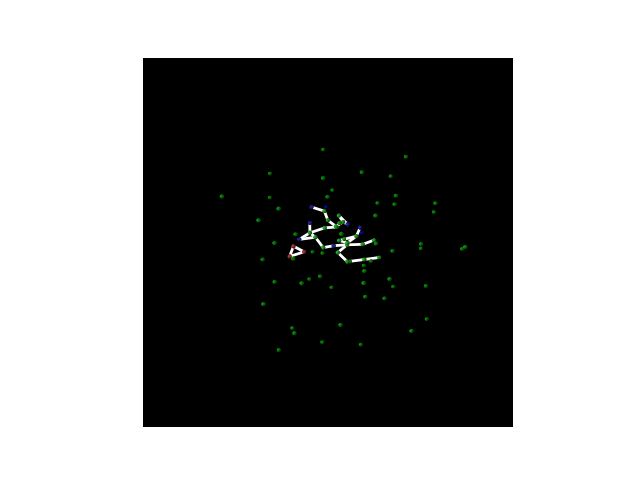

In [26]:
plot_data3d2(position, atom_type, dataset_info, spheres_3d=True)

In [15]:
def visualize_chain(path, dataset_info, wandb=None, spheres_3d=False,
                    mode="chain"):
    files = load_xyz_files(path)
    files = sorted(files)
    save_paths = []

    for i in range(len(files)):
        file = files[i]

        positions, one_hot = load_molecule_xyz(file, dataset_info=dataset_info)

        atom_type = torch.argmax(one_hot, dim=1).numpy()
        fn = file[:-4] + '.png'
        plot_data3d(positions, atom_type, dataset_info=dataset_info,
                    save_path=fn, spheres_3d=spheres_3d, alpha=1.0)
        save_paths.append(fn)

    imgs = [imageio.imread(fn) for fn in save_paths]
    dirname = os.path.dirname(save_paths[0])
    gif_path = dirname + '/output.gif'
    print(f'Creating gif with {len(imgs)} images')
    # Add the last frame 10 times so that the final result remains temporally.
    # imgs.extend([imgs[-1]] * 10)
    imageio.mimsave(gif_path, imgs, subrectangles=True)

    if wandb is not None:
        wandb.log({mode: [wandb.Video(gif_path, caption=gif_path)]})

In [16]:
path_to_molecules = 'D:\Học tập\Lab314\KhoaLuan\MODELS\Models\DIFF\logs\epoch_49'
visualize_chain(path_to_molecules, dataset_info, spheres_3d=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_27744\582344187.py:67: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(save_path)


Creating gif with 5 images


C:\Users\admin\AppData\Local\Temp\ipykernel_27744\2634615658.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imgs = [imageio.imread(fn) for fn in save_paths]
